In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_table("smsspamcollection.tsv")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
df["label"]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df["message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud

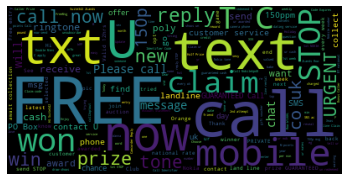

In [9]:
wc = WordCloud()
wc.generate(" ".join(df[df["label"]=="spam"]["message"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

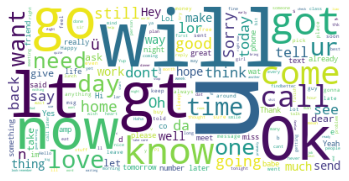

In [10]:
wc = WordCloud(background_color="white")
wc.generate(" ".join(df[df["label"]=="ham"]["message"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [11]:
x = df["message"]
y = df["label"]

In [12]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [13]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [20]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:-  {test}")
    print(classification_report(ytest,ypred))
    return model

In [21]:
gb = mymodel(GaussianNB())

Training Accuracy:- 0.9571794871794872
 Testing Accuracy:-  0.9013157894736842
              precision    recall  f1-score   support

         ham       0.99      0.90      0.94      1442
        spam       0.59      0.92      0.72       230

    accuracy                           0.90      1672
   macro avg       0.79      0.91      0.83      1672
weighted avg       0.93      0.90      0.91      1672



In [22]:
bb = mymodel(BernoulliNB())

Training Accuracy:- 0.9851282051282051
 Testing Accuracy:-  0.9796650717703349
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.88      0.92       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [23]:
mb = mymodel(MultinomialNB())

Training Accuracy:- 0.9925641025641025
 Testing Accuracy:-  0.9838516746411483
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1442
        spam       0.94      0.94      0.94       230

    accuracy                           0.98      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.98      0.98      0.98      1672



# Forecast New Observation

In [24]:
mesg1 = "free...free..free...! buy 1 get 1 free offer valid till tom..."
mesg2 = "u all will have mock on thursday"

In [27]:
xnew = cv.transform([mesg2]).toarray()
mb.predict(xnew)[0]

'ham'

In [28]:
def checksentiment(text):
    xnew = cv.transform([text]).toarray()
    ypred = mb.predict(xnew)
    return ypred[0]

In [31]:
checksentiment("please call me urgent baby")

'ham'

In [32]:
checksentiment("please call me whenever you are free")

'ham'

In [34]:
checksentiment("please call me urgent baby we got free.... free... offer tomorrow")

'spam'

In [35]:
checksentiment("you have won! the race")

'ham'